In [32]:
# !pip install POT
# !ls plots
# ####Required liberaries (uncomment to install)
# ! pip install seaborn
# ! pip install pandas
# !pip install scipy
# !mkdir plots
from  scipy.optimize import newton
import math
# from google.colab import files
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy import signal
import matplotlib
import itertools
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt
from scipy.special import sici
import pandas as pd
import seaborn as sns
# import ot
# font = {'size'   : 12}

# matplotlib.rc('font', **font)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

matplotlib.rcParams["figure.dpi"] = 300
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_theme()
sns.set_context('paper')

style = {"grid.linestyle": ":", 
        "border.color": "black",
       "axes.edgecolor": "black",
       "xtick.bottom": "True",
       "xtick.top": "True",
       "ytick.left": "True",
       "ytick.right": "True",
       "xtick.direction": "in",
       "ytick.direction": "in"}
# from ssl import PROTOCOL_TLSv1_2
sns.set_style("whitegrid", style)
sns.set(font_scale=1.2)

In [36]:
# BN without BN
n = 5
d = 1000

eps = 0.000001

T = 70
c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
    x = w@x/math.sqrt(d)
    x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
    xnorm = np.linalg.norm(x,axis=1)
    x = ((math.sqrt(n)*x.T)/xnorm).T
    x = np.maximum(x,0)
    return x

all_results = []
results = []

print(d,"----")
dists = []
dists2 = []
ids = []
### covariance of relu 
c = -1./(n-1)
cstar = (math.sqrt(1-c**2)+c*(math.pi-np.arccos(c))) / math.pi
C = 0.5*((1-cstar)*np.eye(n) + cstar*np.ones((n,n)))
print(C)
for k in range(repeat):
  r = np.random.randn(n)
  x = np.zeros((d,n))
  for q in range(d): 
    x[q,:] = r + eps*np.random.randn(n)
  x2 = np.random.randn(d,n)/math.sqrt(d)
  for i in range(T):
    w = np.random.randn(d,d)/math.sqrt(d)
    x = bn(w,x,d)
    x2 = w @ x2
    if i % 3 ==0:   
      dists2.append(np.linalg.norm(x.T@x/d-C))
      dists.append(np.linalg.norm(x2.T@x2-np.eye(n)))
      ids.append(i)
all_results.append(dists)

run_dict={'run_id': ids,'dists': dists,'dists2': dists2}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

1000 ----
[[0.5        0.10165494 0.10165494 0.10165494 0.10165494]
 [0.10165494 0.5        0.10165494 0.10165494 0.10165494]
 [0.10165494 0.10165494 0.5        0.10165494 0.10165494]
 [0.10165494 0.10165494 0.10165494 0.5        0.10165494]
 [0.10165494 0.10165494 0.10165494 0.10165494 0.5       ]]


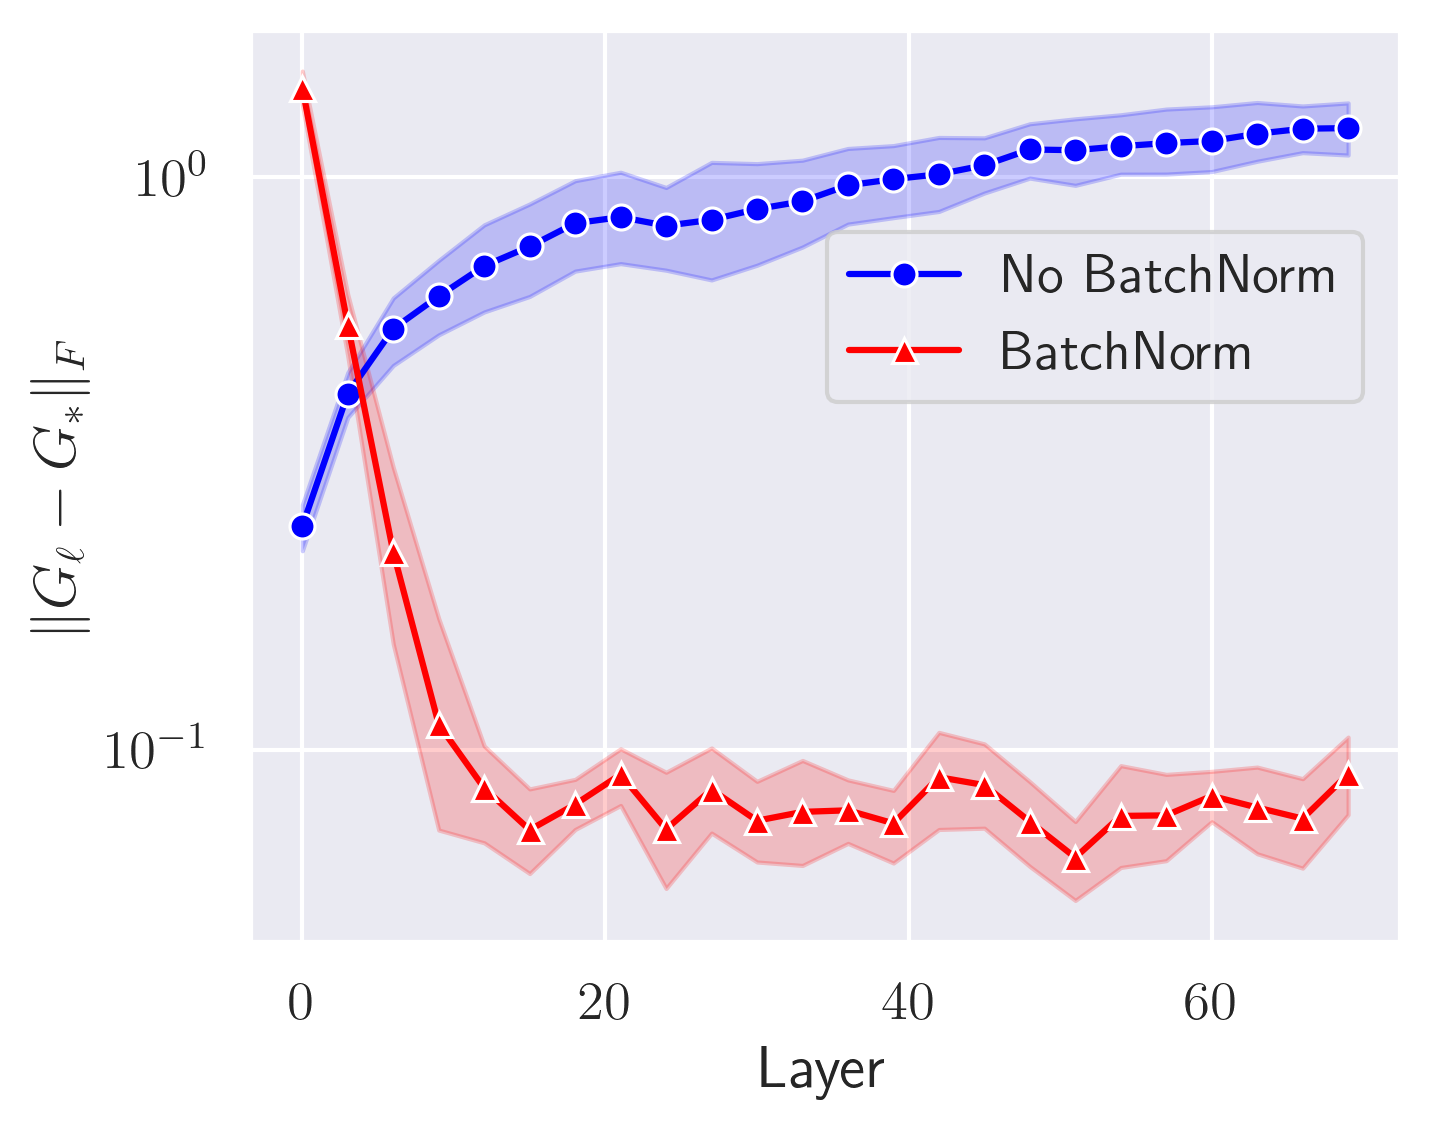

In [52]:

sns.set_style("whitegrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(5, 4))

p1 = sns.lineplot(data=results, x="run_id", y="dists", marker='o', errorbar=('ci', 95), color='blue', label='No BatchNorm')
p2 = sns.lineplot(data=results, x="run_id", y="dists2", marker='^', errorbar=('ci', 95), color='red', label='BatchNorm')

p1.set_ylabel(r'$\| G_\ell - G_*\|_F$')
p1.set_xlabel('Layer')
p1.set_yscale('log')
# p1.set_title("Distance of Covariance vs. Depth", loc='left')

# Remove legend from the first plot and add a separate legend
p1.get_legend().remove()
plt.figlegend(loc='upper right',bbox_to_anchor=(.95,.8))

plt.tight_layout()

# Save the figure
plt.savefig('icml_plots/bn_without.pdf', format='pdf')

# Show the plot
plt.show()

In [27]:
n = 10
d = 1000

eps = 0.000001

T = 70
c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
  x = w@x/math.sqrt(d)
  x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
  xnorm = np.linalg.norm(x,axis=1)
  x = ((math.sqrt(n)*x.T)/xnorm).T
  x = np.maximum(x,0)
  return x
ds = [100,500]
all_results = []
results = []
for d in ds:
  print(d,"----")
  dists = []
  ids = []
  ### covariance of relu 
  c = -1./(n-1)
  cstar = (math.sqrt(1-c**2)+c*(math.pi-np.arccos(c)))/math.pi
  C = 0.5*((1-cstar)*np.eye(n) + cstar*np.ones((n,n)))

  for k in range(repeat):
    r = np.random.randn(n)
    x = np.zeros((d,n))
    for q in range(d): 
      x[q,:] = r + eps*np.random.randn(n)
    x2 = np.random.randn(d,n)
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      x = bn(w,x,d)
      x2 = bn(w,x2,d)
  
      if i % 3 ==0:
        
        # print(k,i, np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        dists.append(np.linalg.norm(x.T@x/d-C))
        ids.append(i)
  all_results.append(dists)

run_dict={'run_id': ids,'dists':all_results[0],'dists2':all_results[1]}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

100 ----
500 ----


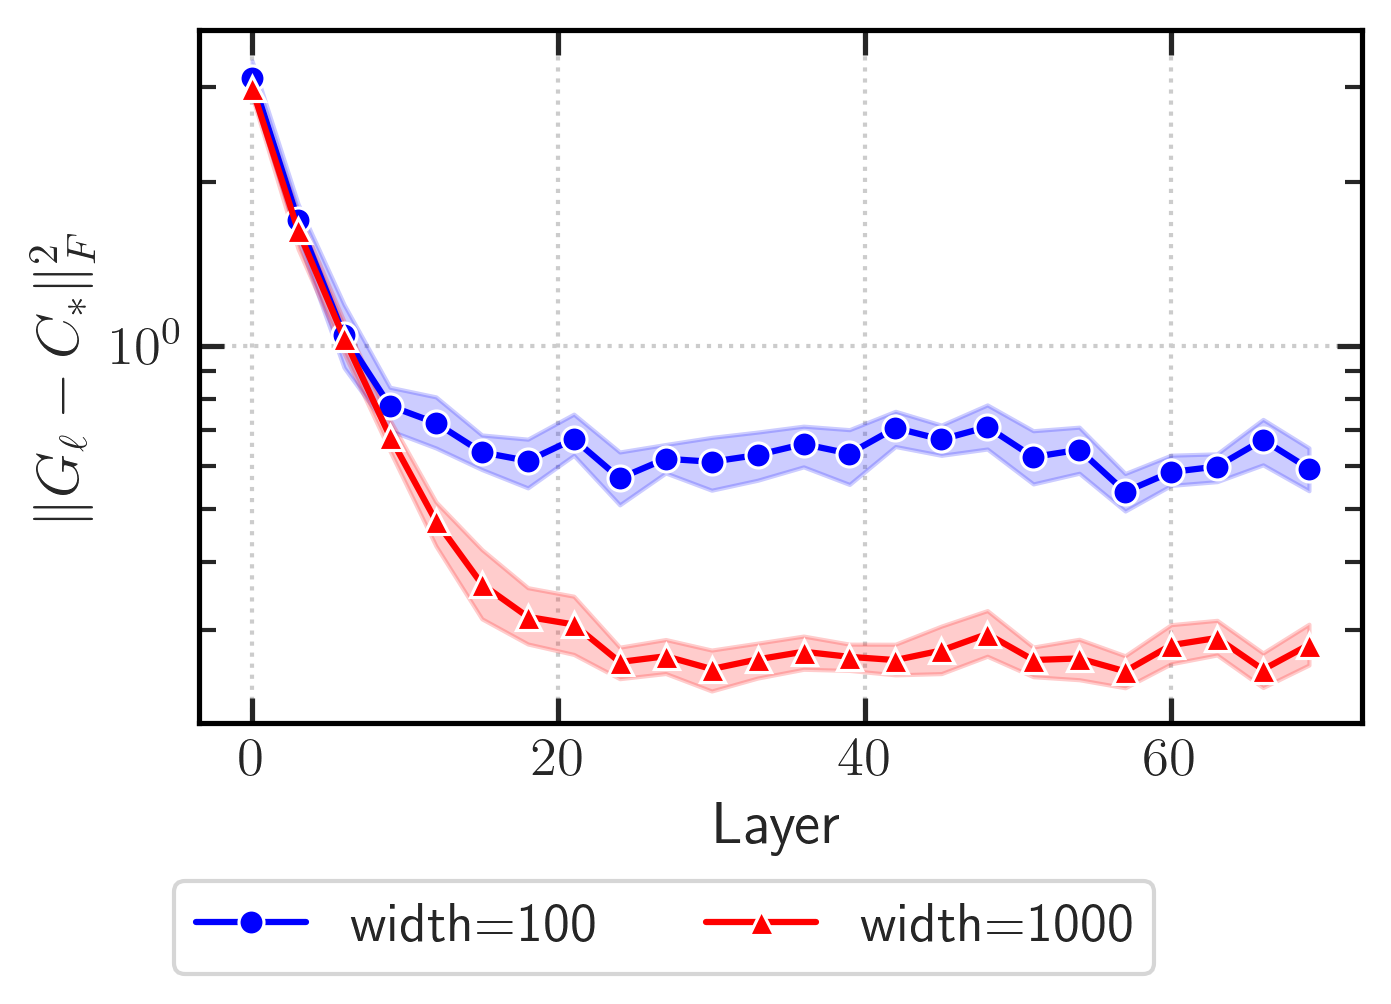

In [23]:
sns.set_style("whitegrid", style)
plt.figure(figsize=(5, 3))
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', errorbar=('ci', 95), color='blue',label='width=100')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='^',errorbar=('ci', 95), color='red',label='width=1000')
# p1.set(xlabel='Layer',fontsize=15)
p1.set_xlabel('Layer')
p1.set_ylabel(r'$\|G_\ell-C_*\|_{F}^2$')
p1.set_yscale('log')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=2,bbox_to_anchor=(0.78,-0.20))
fig = p2.get_figure()
fig.savefig('icml_plots/depth_width_bn.pdf',format='pdf',bbox_inches='tight')
fig

In [28]:
n = 10
d = 1000

x = np.zeros((d,n))
eps = 0.000001

x1 = np.random.randn(100000,n)
x1norm = np.linalg.norm(x1,axis=1)
x1 = ((math.sqrt(n)*x1.T)/x1norm).T
Beta = np.mean(np.tanh(x1[:,0])**2)
Beta1 = np.mean(np.sin(x1[:,0])**2)
T = 100
c = np.zeros((n,n))
repeat = 10
convs = np.zeros((10,repeat))
results = []
ids = []
dists = []
dists2 = []
### covariance of relu

for k in range(repeat):
  r = np.random.randn(n)
  for i in range(d): 
   x[i,:] = r + eps*np.random.randn(n)
  x2 = x.copy()
  for i in range(T):
    w = np.random.randn(d,d)/math.sqrt(d)
    xnorm = np.linalg.norm(x,axis=1)
    x = ((math.sqrt(n)*x.T)/xnorm).T
    x = np.tanh(x)
    x = w@x/math.sqrt(d)

    x2norm = np.linalg.norm(x2,axis=1)
    x2 = ((math.sqrt(n)*x2.T)/x2norm).T
    x2 = np.sin(x2)
    x2 = w@x2/math.sqrt(d)

    c = c + x.T@x/T
    if i % 10 ==0:
      convs[int(i/10),k] = np.linalg.norm(x.T@x-Beta*np.eye(n))
      dists.append(np.linalg.norm(x.T@x-Beta*np.eye(n),ord=2))
      dists2.append(np.linalg.norm(x2.T@x2-Beta1*np.eye(n),ord=2))
      ids.append(i)

run_dict={'run_id': ids,'dists': dists, 'dists2': dists2}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

In [29]:
# contracting grams 
n = 10
d = 1000

eps = 0.000001

T = 70
c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
  x = w@x/math.sqrt(d)
  x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
  xnorm = np.linalg.norm(x,axis=1)
  x = ((math.sqrt(n)*x.T)/xnorm).T
  x = np.maximum(x,0)
  return x
ds = [100,1000]
all_results = []
results = []
for d in ds:
  print(d,"----")
  dists = []
  ids = []
  for k in range(repeat):
    r = np.random.randn(n)
    x = np.zeros((d,n))
    for q in range(d): 
      x[q,:] = r + eps*np.random.randn(n)
    x2 = np.random.randn(d,n)
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      x = bn(w,x,d)
      x2 = bn(w,x2,d)
  
      if i % 3 ==0:
        
        # print(k,i, np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        dists.append(np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        ids.append(i)
  all_results.append(dists)

run_dict={'run_id': ids,'dists':all_results[0],'dists2': all_results[1]}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

100 ----
1000 ----


In [30]:
sns.set_style("whitegrid", style)
sns.set(font_scale=1.2)

plt.figure(figsize=(5, 3))
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', errorbar=('ci', 95),color='blue',label='width=100')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='^',errorbar=('ci', 95),color='red',label='width=1000')
p1.set_xlabel('Layer')
p1.set_ylabel(r'$\|.\|_{Fro}$')
p1.set_yscale('log')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=2,bbox_to_anchor=(0.78,-0.15))
fig = p2.get_figure()
fig.savefig('depth_norm.pdf',format='pdf')

In [31]:
n = 10
ds = [50,400,800,1200,1600,2000]


eps = 0.000001

x1 = np.random.randn(100000,n)
x1norm = np.linalg.norm(x1,axis=1)
x1 = ((math.sqrt(n)*x1.T)/x1norm).T
Beta = np.mean(np.sin(x1[:,0])**2)


repeat = 2
convs = np.zeros((10,repeat))
results = []
ids = []
dists = []
dists2 = []
dists3 = []
for k in range(repeat):
  print(k)
  for d in ds:
    avgerror = 0
    avgerror2 = 0
    x = np.zeros((d,n))
    r = np.random.randn(n)
    for i in range(d): 
      x[i,:] = r + eps*np.random.randn(n)
    x2 = x.copy()
    T = 100
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      xnorm = np.linalg.norm(x,axis=1)
      x = ((math.sqrt(n)*x.T)/xnorm).T
      x = np.tanh(x)
      x = w@x/math.sqrt(d)

      x2norm = np.linalg.norm(x2,axis=1)
      x2 = ((math.sqrt(n)*x2.T)/x2norm).T
      x2 = np.sin(x2)
      x2 = w@x2/math.sqrt(d)
    dists.append(np.linalg.norm(x.T@x-Beta*np.eye(n),ord = 2))
    dists2.append(np.linalg.norm(x2.T@x2-Beta1*np.eye(n),ord =2)/(T-49))
    dists3.append(n**(1.5)/np.sqrt(d))
    ids.append(d)

run_dict={'run_id': ids,'dists':dists,'dists2':dists2,'dists3':dists3}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

0
1


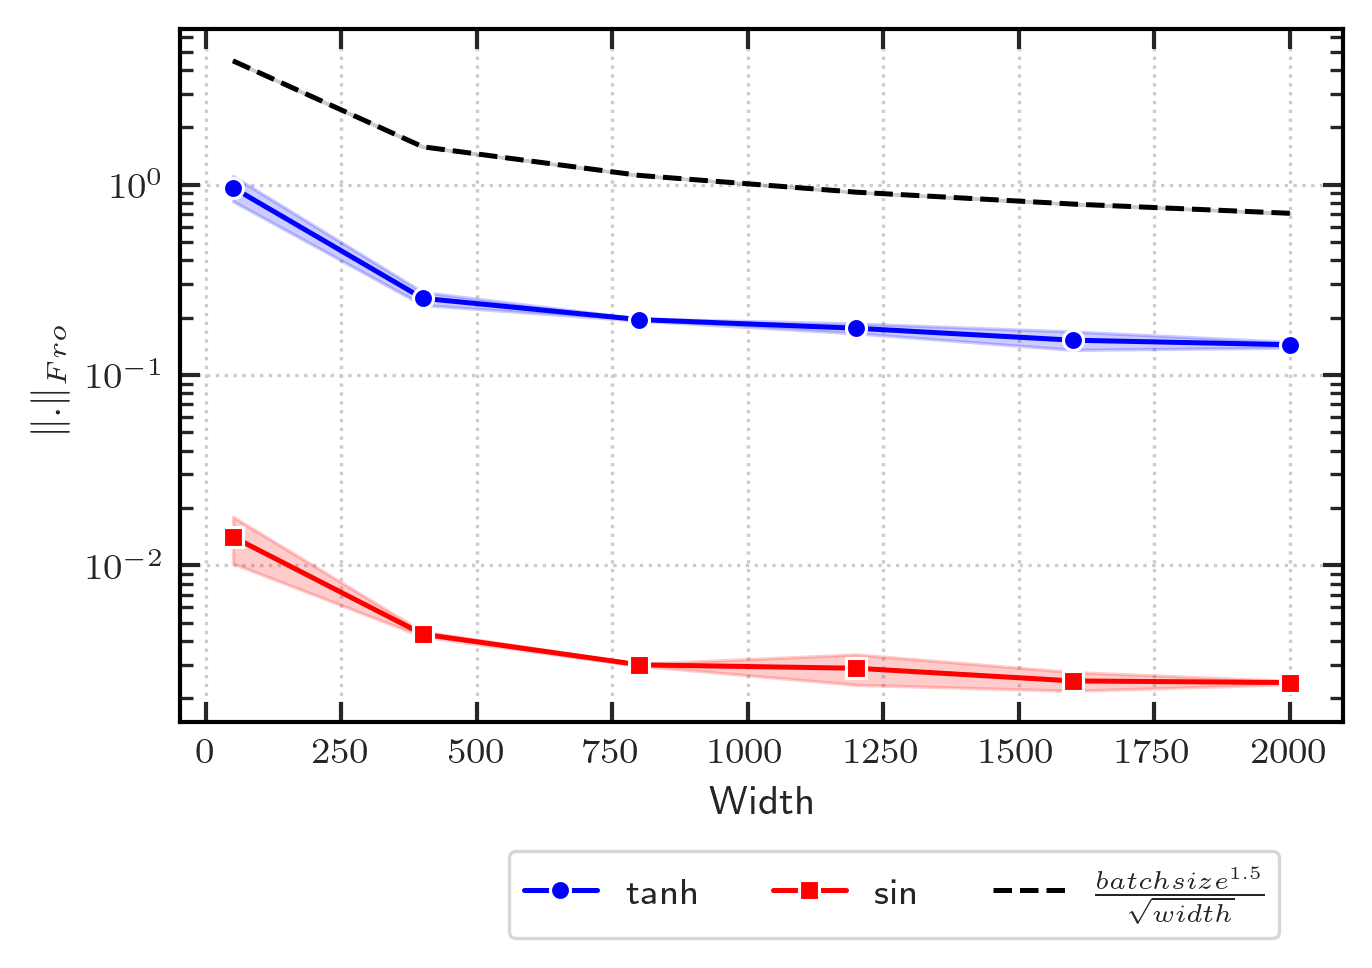

In [56]:
# from ssl import PROTOCOL_TLSv1_2
# run_dict["dists3"] = 10+np.asarray(run_dict["dists3"])
plt.figure(figsize=(5, 3))
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', errorbar=('ci', 95),color='blue',label='tanh')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='s',errorbar=('ci', 95),color='red',label='sin')
p3 = sns.lineplot(data=results,x="run_id",y="dists3", errorbar=('ci', 95),color='black',label=r'$\frac{batchsize^{1.5}}{\sqrt{width}}$',linestyle='--')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\|.\|_{Fro}$')
p1.set_yscale('log')

p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))
# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')

In [46]:
run_dict

{'run_id': [50, 400, 800, 1200, 1600, 2000, 50, 400, 800, 1200, 1600, 2000],
 'dists': [1.1103226879475427,
  0.2332530537643365,
  0.1978098802201483,
  0.16556961870328046,
  0.169067018128033,
  0.14922033883322058,
  0.8176136912247639,
  0.2724846554579585,
  0.19288364241546233,
  0.18635072973100425,
  0.1354622561130722,
  0.13912089283832352],
 'dists2': [0.017958167189526926,
  0.004477134790286452,
  0.002963958116390927,
  0.002353746903867764,
  0.002189138639877854,
  0.0024686701895710508,
  0.0102194394868794,
  0.004218516342817496,
  0.003034142245627832,
  0.0034010296333895516,
  0.0027460952765533163,
  0.0023713618815311456],
 'dists3': [4.472135954999579,
  1.5811388300841895,
  1.1180339887498947,
  0.9128709291752768,
  0.7905694150420948,
  0.7071067811865475,
  4.472135954999579,
  1.5811388300841895,
  1.1180339887498947,
  0.9128709291752768,
  0.7905694150420948,
  0.7071067811865475]}

# Remarks

## Remark1

In [329]:
# BN without BN
from collections import defaultdict
n = 10
ds = [10000]
alpha = 0.01
L = 10
t_vals = [0.01]

c = np.zeros((n,n))
repeat = 10

def ReLU(x):
    return x * (x > 0)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

id_results = []
sin_results = []
tanh_results = []
relu_results = []
sigmoid_results = []

# run_dict={'run_id': ids,'dists': dists,'dists2': dists2}

In [330]:
for t in t_vals:
    print("t = ", t)
    op_norms = defaultdict(list)
    for d in ds:
        for k in range(repeat):
            x = np.random.rand(d, n)/math.sqrt(d)
            for l in range(L):
                w = np.random.randn(d,d)/math.sqrt(d)
                x = bn(w,x,d)

            G_l = 1/d * x.T @ x
            w, v = np.linalg.eig(G_l)
            print(np.linalg.eigvals(G_l))
            break
            
            op_norm = np.max(np.linalg.eigvals(G_l))# / np.mean(np.linalg.eigvals(G_l))
            op_norms[d].append(op_norm)
    id_results.append(op_norms)

t =  0.01
[1.69250176 0.39114707 0.34270783 0.34567693 0.38450028 0.37964981
 0.37305788 0.36874707 0.36118727 0.35908265]


In [312]:
for t in t_vals:
    print("t = ", t)
    op_norms = defaultdict(list)
    for d in ds:
        for k in range(repeat):
            x = np.random.rand(d, n)/math.sqrt(d)
            for l in range(L):
                w = np.random.randn(d,d)/math.sqrt(d)
                x = bn(w,x,d)
                x = np.sin(x)
                
            G_l = 1/d * x.T @ x
            op_norm = np.max(np.linalg.eigvals(G_l))# / np.mean(np.linalg.eigvals(G_l))
            op_norms[d].append(op_norm)
    sin_results.append(op_norms)

t =  0.01


In [313]:
for t in t_vals:
    print("t = ", t)
    op_norms = defaultdict(list)
    for d in ds:
        for k in range(repeat):
            x = np.random.rand(d, n)/math.sqrt(d)
            for l in range(L):
                w = np.random.randn(d,d)/math.sqrt(d)
                x = bn(w,x,d)
                x = np.tanh(x)
                
            G_l = 1/d * x.T @ x
            op_norm = np.max(np.linalg.eigvals(G_l))# / np.mean(np.linalg.eigvals(G_l))
            op_norms[d].append(op_norm)
    tanh_results.append(op_norms)

t =  0.01


In [314]:
for t in t_vals:
    print("t = ", t)
    op_norms = defaultdict(list)
    for d in ds:
        for k in range(repeat):
            x = np.random.rand(d, n)/math.sqrt(d)
            for l in range(L):
                w = np.random.randn(d,d)/math.sqrt(d)
                x = bn(w,x,d)
                x = ReLU(x)
                
            G_l = 1/d * x.T @ x
            op_norm = np.max(np.linalg.eigvals(G_l))# / np.mean(np.linalg.eigvals(G_l))
            op_norms[d].append(op_norm)
    relu_results.append(op_norms)

t =  0.01


In [315]:
for t in t_vals:
    print("t = ", t)
    op_norms = defaultdict(list)
    for d in ds:
        for k in range(repeat):
            x = np.random.rand(d, n)/math.sqrt(d)
            for l in range(L):
                w = np.random.randn(d,d)/math.sqrt(d)
                x = bn(w,x,d)
                x = sigmoid(x)
                
            G_l = 1/d * x.T @ x
            op_norm = np.max(np.linalg.eigvals(G_l))# / np.mean(np.linalg.eigvals(G_l))
            op_norms[d].append(op_norm)
    sigmoid_results.append(op_norms)

t =  0.01


In [316]:
ds = np.asarray(ds)
eps = np.exp(-alpha * L / 2) + n * (1/np.sqrt(ds)) * (1/np.sqrt(alpha)) * np.log(ds / n)

In [317]:
layers = []
id_results_99 = []
sin_results_99 = []
tanh_results_99 = []
relu_results_99 = []
sigmoid_results_99 = []
lb_99 = []
ub_99 = []
for di, d in enumerate(ds):
    id_results_99 += id_results[0][d]
    sin_results_99 += sin_results[0][d]
    tanh_results_99 += tanh_results[0][d]
    relu_results_99 += relu_results[0][d]
    sigmoid_results_99 += sigmoid_results[0][d]
    
    layers += [d] * repeat
    
    lb_99 += [1 - t_vals[0] * eps[di]] * repeat
    ub_99 += [1 + t_vals[0] * eps[di]] * repeat
    
    
run_dict={'layer': layers, 'lb99': lb_99, "ub99": ub_99, 
          'id_results_99': id_results_99,
          'sin_results_99': sin_results_99,
          'tanh_results_99': tanh_results_99,
          'relu_results_99': relu_results_99,
          'sigmoid_results_99': sigmoid_results_99,
         }
res = pd.DataFrame(run_dict)

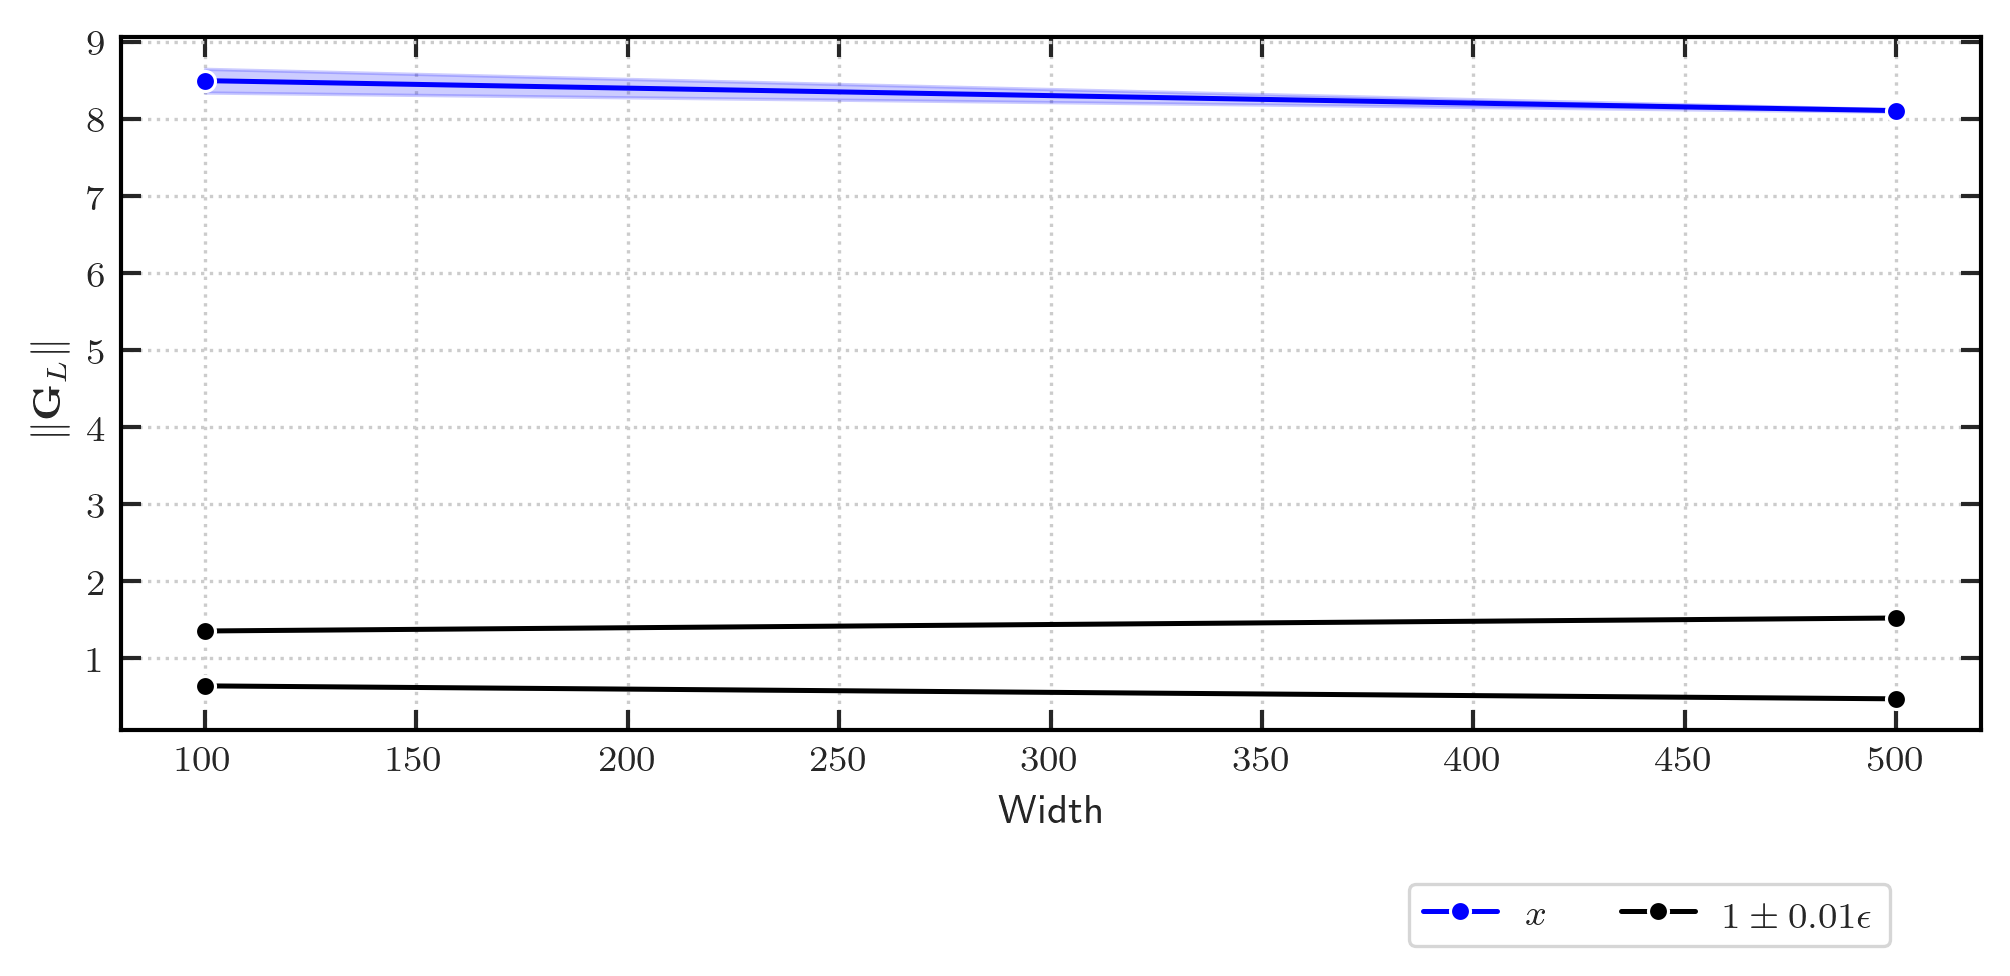

In [318]:
plt.figure(figsize=(8, 3))
p1 = sns.lineplot(data=res, x="layer", y="id_results_99",  marker = 'o', errorbar=('ci', 95),color='blue',label='$x$')
p1 = sns.lineplot(data=res, x="layer", y="lb99",  marker = 'o',color='black',label='$1 \pm 0.01 \epsilon$')
p1 = sns.lineplot(data=res, x="layer", y="ub99",  marker = 'o',color='black')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\| \mathbf{G}_L \|$')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))

# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')

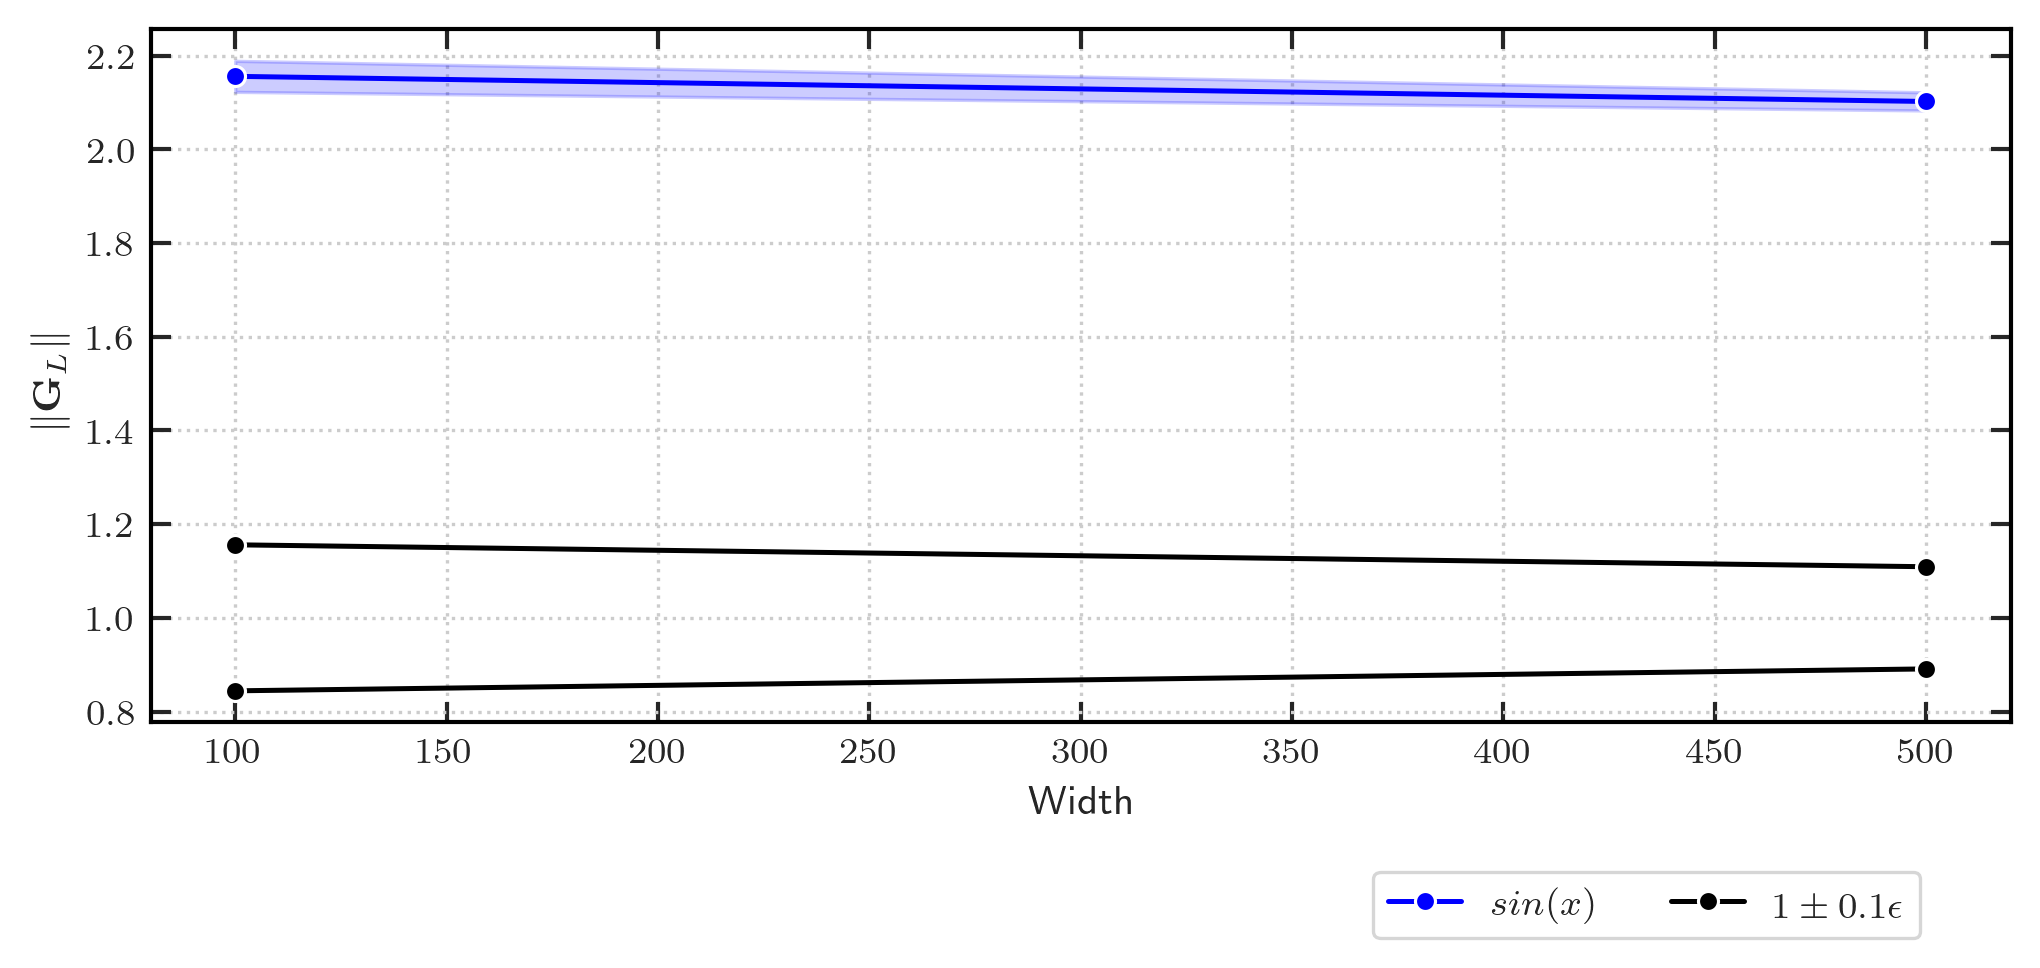

In [288]:
plt.figure(figsize=(8, 3))
p1 = sns.lineplot(data=res, x="layer", y="sin_results_99",  marker = 'o', errorbar=('ci', 95),color='blue',label='$sin(x)$')
p1 = sns.lineplot(data=res, x="layer", y="lb99",  marker = 'o',color='black',label='$1 \pm 0.1 \epsilon$')
p1 = sns.lineplot(data=res, x="layer", y="ub99",  marker = 'o',color='black')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\| \mathbf{G}_L \|$')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))

# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')

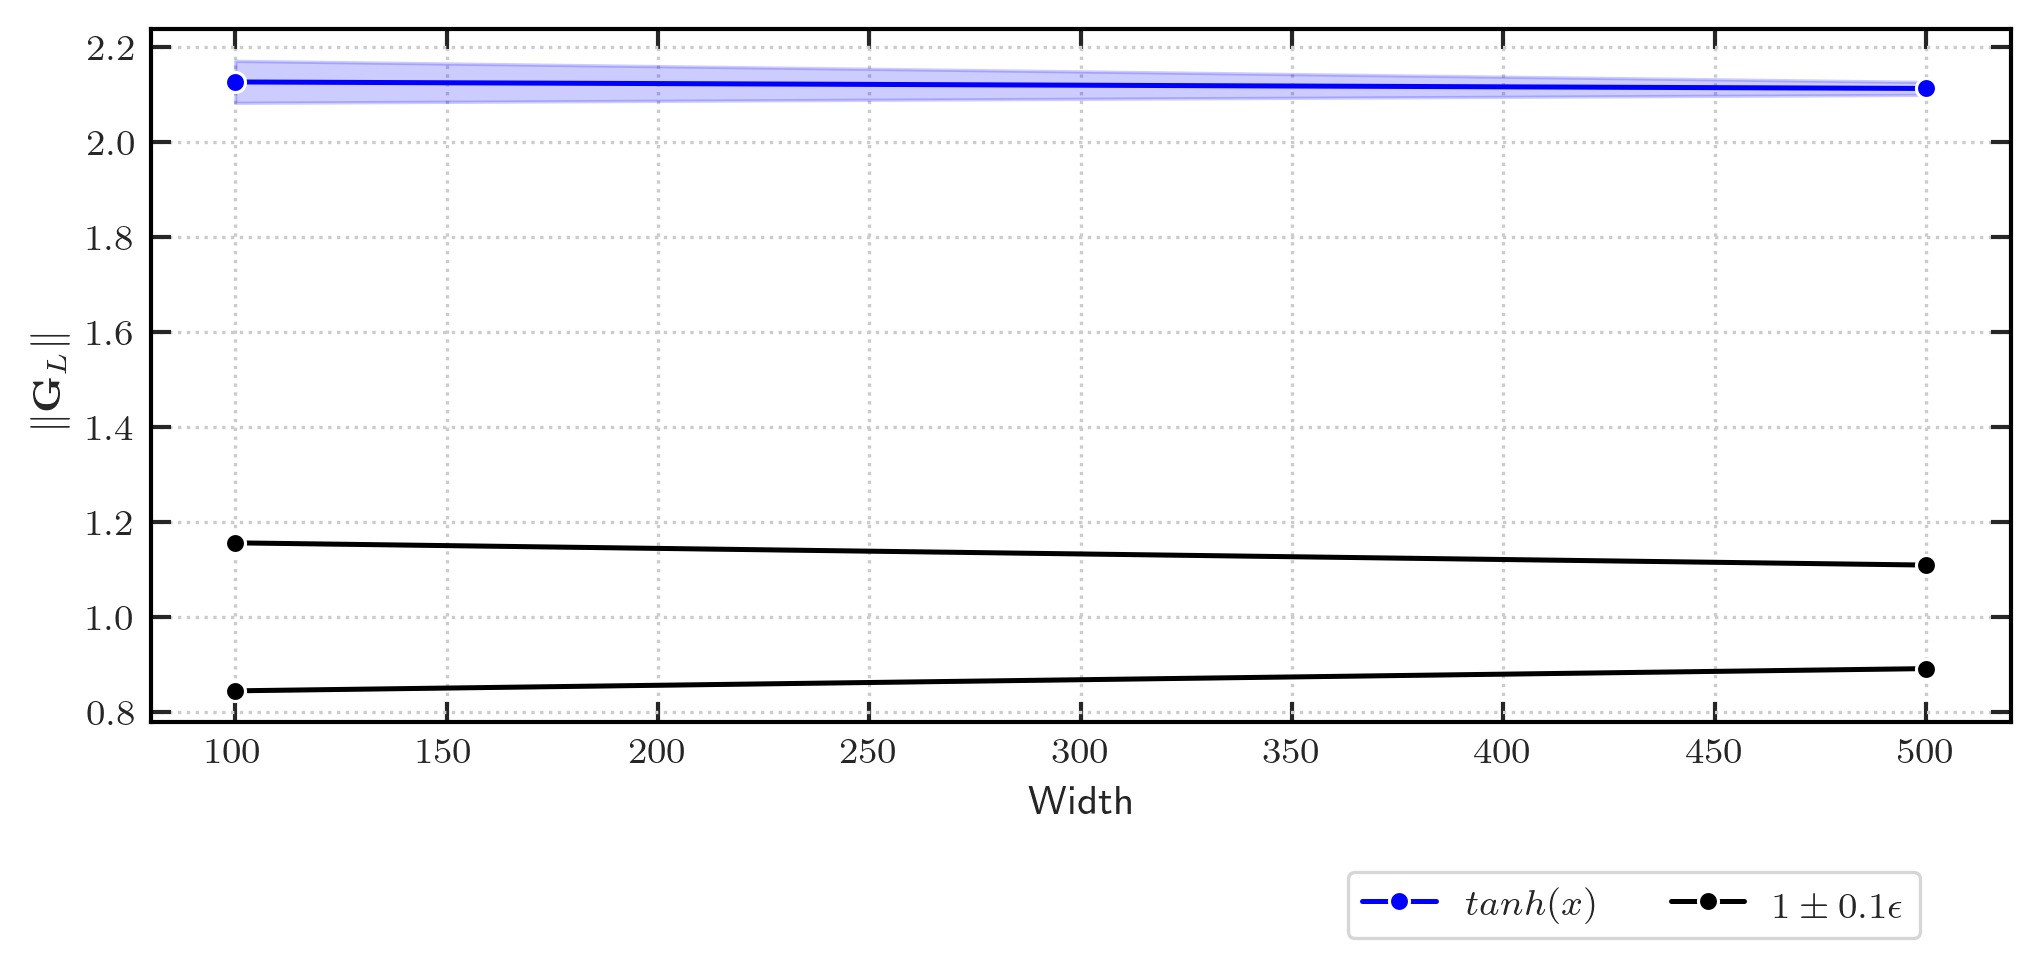

In [289]:
plt.figure(figsize=(8, 3))
p1 = sns.lineplot(data=res, x="layer", y="tanh_results_99",  marker = 'o', errorbar=('ci', 95),color='blue',label='$tanh(x)$')
p1 = sns.lineplot(data=res, x="layer", y="lb99",  marker = 'o',color='black',label='$1 \pm 0.1 \epsilon$')
p1 = sns.lineplot(data=res, x="layer", y="ub99",  marker = 'o',color='black')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\| \mathbf{G}_L \|$')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))

# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')

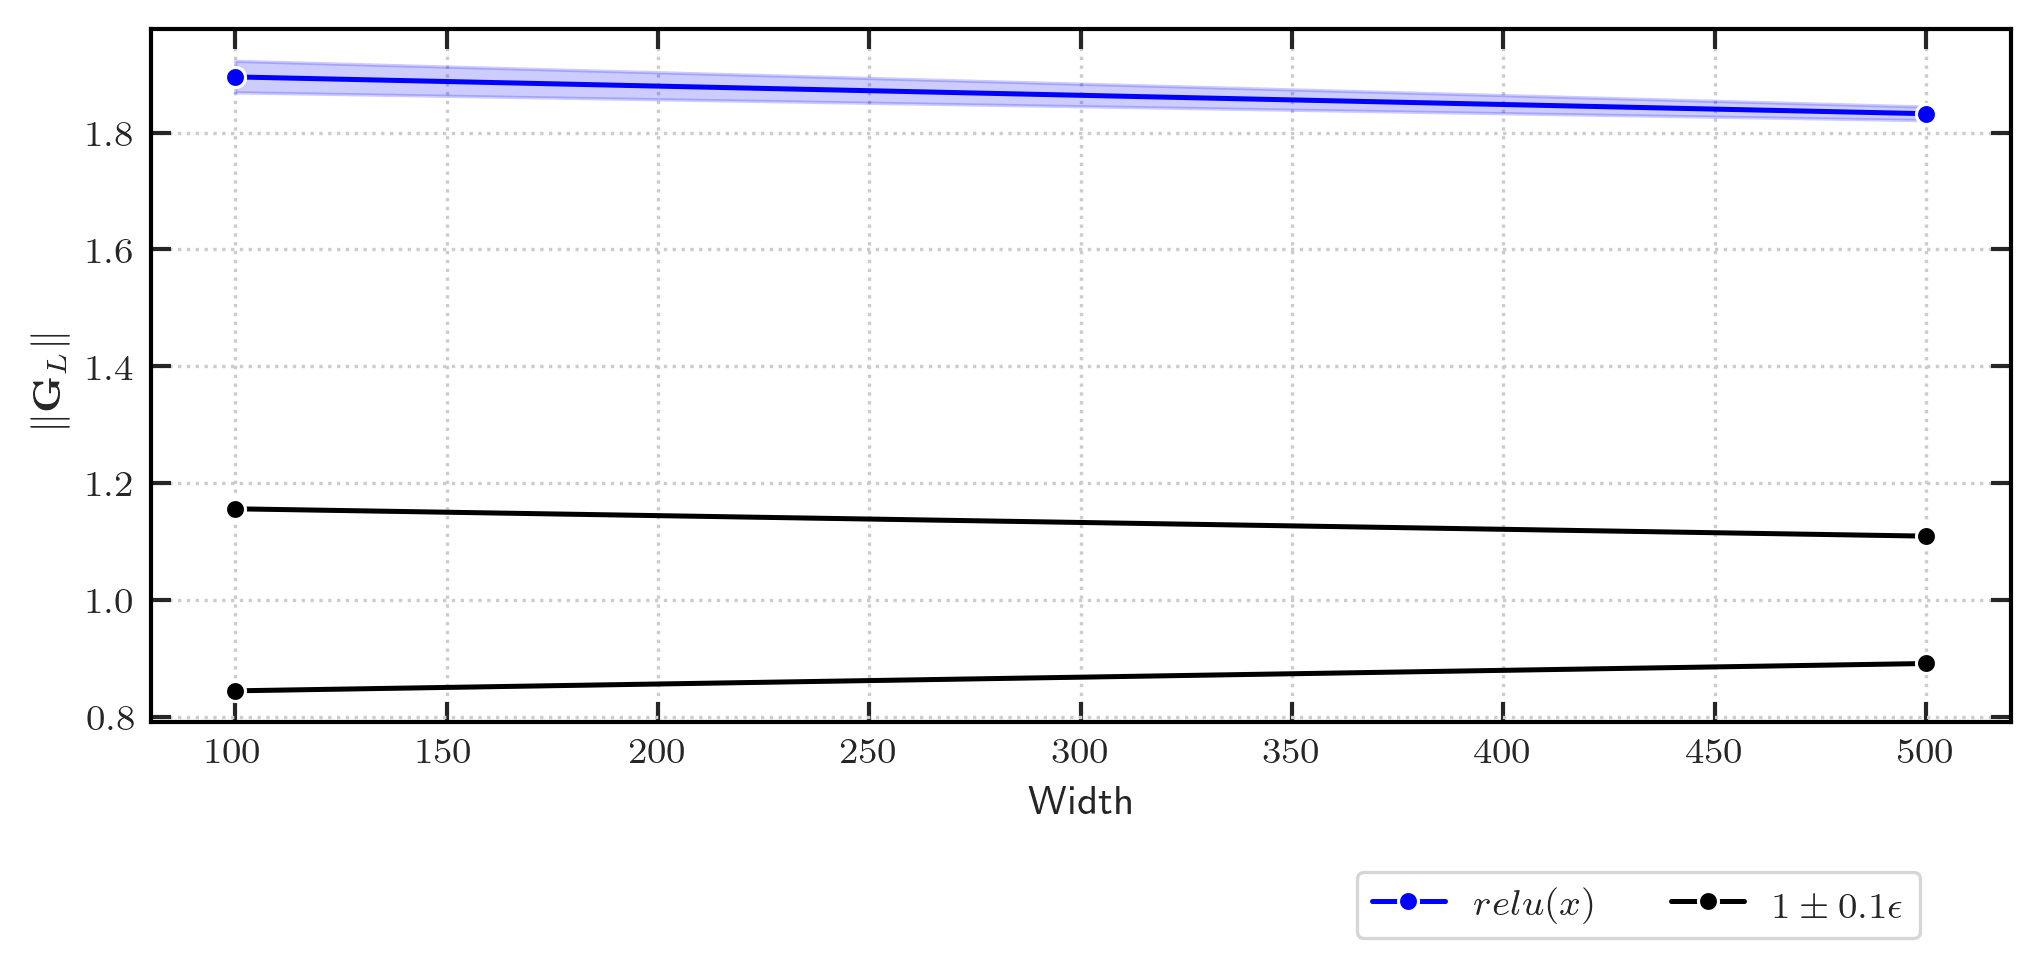

In [290]:
plt.figure(figsize=(8, 3))
p1 = sns.lineplot(data=res, x="layer", y="relu_results_99",  marker = 'o', errorbar=('ci', 95),color='blue',label='$relu(x)$')
p1 = sns.lineplot(data=res, x="layer", y="lb99",  marker = 'o',color='black',label='$1 \pm 0.1 \epsilon$')
p1 = sns.lineplot(data=res, x="layer", y="ub99",  marker = 'o',color='black')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\| \mathbf{G}_L \|$')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))

# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')

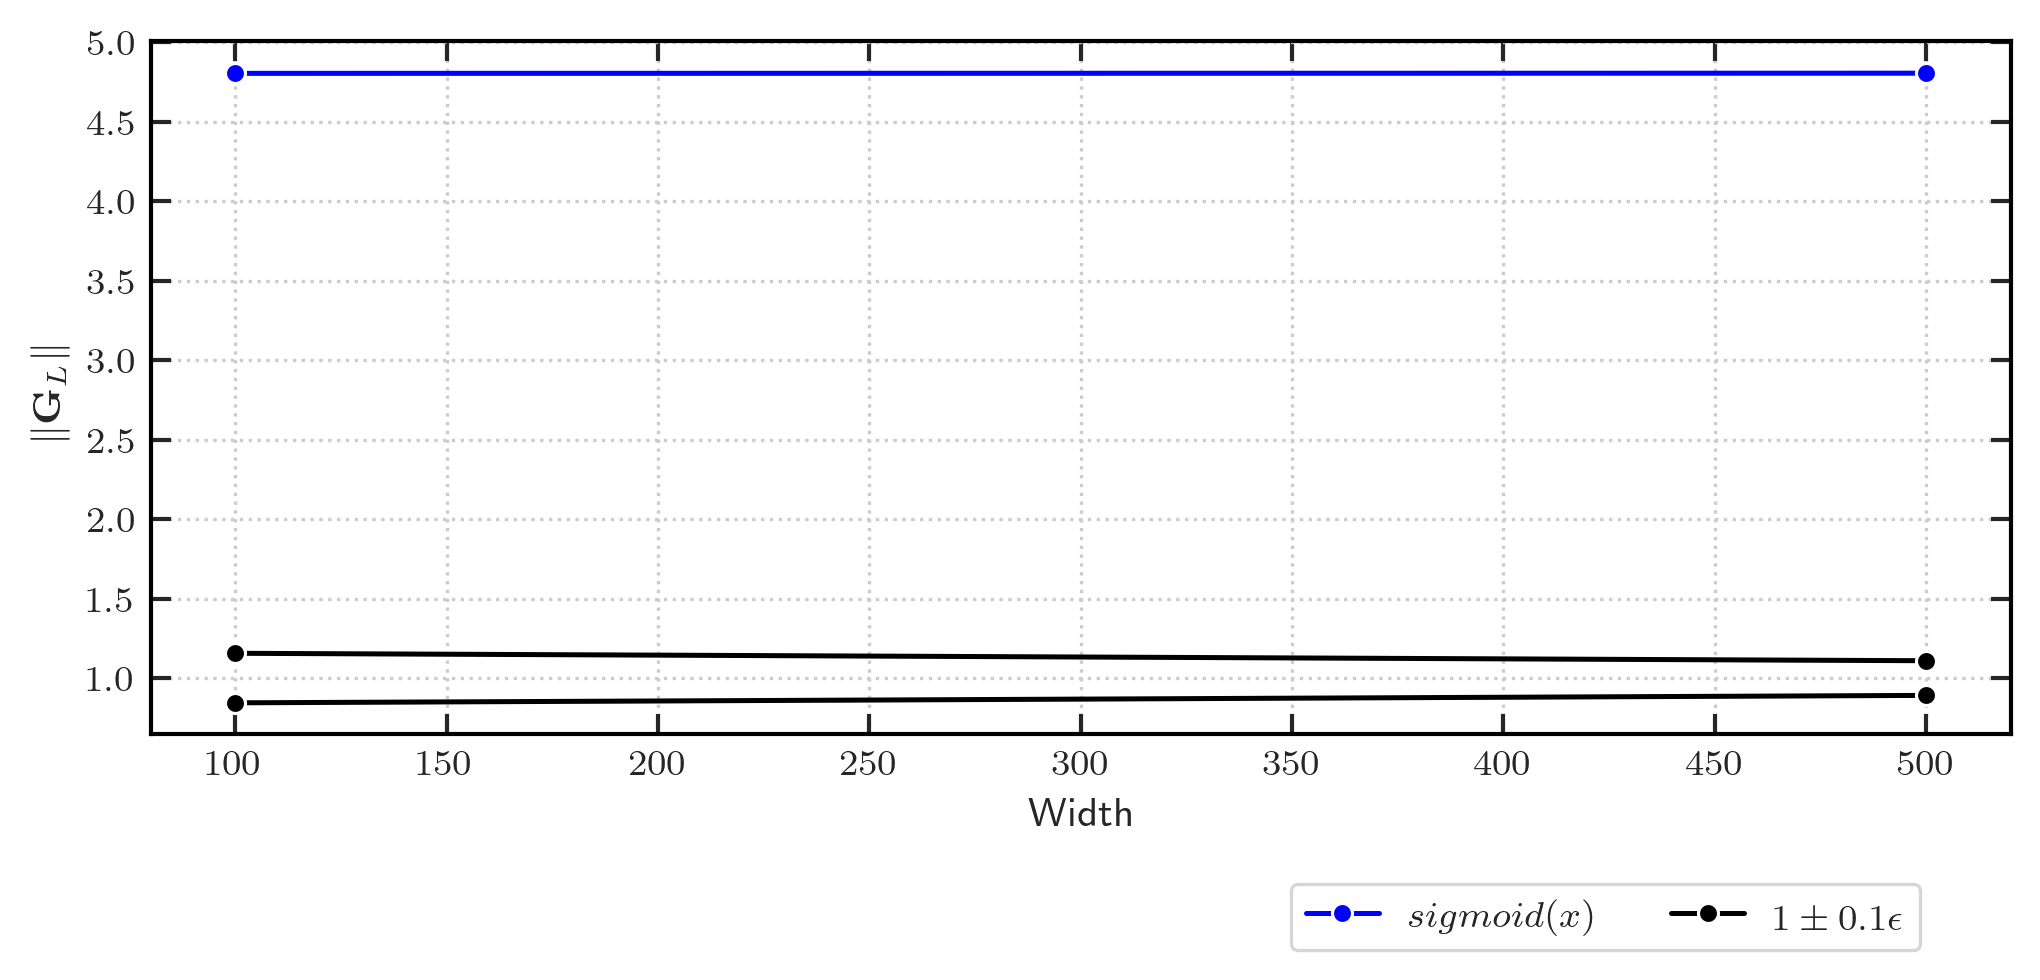

In [291]:
plt.figure(figsize=(8, 3))
p1 = sns.lineplot(data=res, x="layer", y="sigmoid_results_99",  marker = 'o', errorbar=('ci', 95),color='blue',label='$sigmoid(x)$')
p1 = sns.lineplot(data=res, x="layer", y="lb99",  marker = 'o',color='black',label='$1 \pm 0.1 \epsilon$')
p1 = sns.lineplot(data=res, x="layer", y="ub99",  marker = 'o',color='black')
p1.set_xlabel('Width')
p1.set_ylabel(r'$\| \mathbf{G}_L \|$')
p1.get_legend().remove()
plt.figlegend(loc='lower right',ncol=4,bbox_to_anchor=(0.87,-0.15))

# p1.set_legend()
fig = p3.get_figure()
# legend = fig.legend()
# fig.savefig('width_norm.pdf',format='pdf')